In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data = pd.read_csv('2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
data.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
data.describe(exclude = 'number')

,Country or region
count,156
unique,156
top,Trinidad & Tobago
freq,1


## 1. Untuk feature/column Generosity & Perceptions of corruption, hitung dan beri penjelasan (insight) terkait:

- Titik Pusat Data (Central Tendency)
- Persebaran Data (Dispersion)
- Distribusi Data (Distribution)


## Central Tendency

In [7]:
round(data[['Generosity', 'Perceptions of corruption']].mean(),2)

Generosity                   0.18
Perceptions of corruption    0.11
dtype: float64

In [9]:
round(data[['Generosity', 'Perceptions of corruption']].median(),2)

Generosity                   0.18
Perceptions of corruption    0.09
dtype: float64

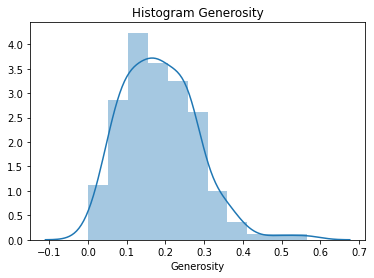

In [10]:
plt.title('Histogram Generosity')
sns.distplot(data['Generosity'])
plt.savefig('histgenerosity.jpg')

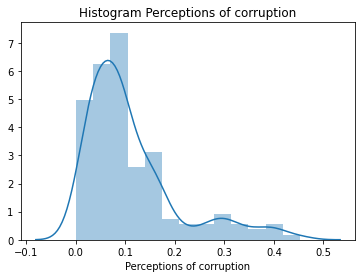

In [11]:
plt.title('Histogram Perceptions of corruption')
sns.distplot(data['Perceptions of corruption'])
plt.savefig('histPerceptions of corruptiony.jpg')

**DILIHAT DARI KEDUA HISTOGRAM DIATAS DAPAT DISIMPULKAN BAHWA SEBARAN DATANYA TIDAK NORMAL(RIGHT SKEWED) SEHINGGA PEMUSAN DATANYA MENGGUNAKAN MEDIAN**

## Dispersion

In [12]:
data[['Generosity', 'Perceptions of corruption']].std()

Generosity                   0.095254
Perceptions of corruption    0.094538
dtype: float64

In [13]:
data[['Generosity', 'Perceptions of corruption']].var()

Generosity                   0.009073
Perceptions of corruption    0.008937
dtype: float64

In [14]:
q1 = data[['Generosity', 'Perceptions of corruption']].quantile(0.25)
q1

Generosity                   0.10875
Perceptions of corruption    0.04700
Name: 0.25, dtype: float64

In [15]:
q3 = data[['Generosity', 'Perceptions of corruption']].quantile(0.75)
q3

Generosity                   0.24825
Perceptions of corruption    0.14125
Name: 0.75, dtype: float64

In [16]:
iqr = q3 - q1
iqr

Generosity                   0.13950
Perceptions of corruption    0.09425
dtype: float64

## Distribution

In [17]:
from scipy.stats import kstest

In [18]:
stat1, pval1 = kstest(data['Generosity'], 'norm')
pval1 < 0.05

True

In [19]:
stat2, pval2 = kstest(data['Perceptions of corruption'], 'norm')
pval2 < 0.05

True

**DARI HASIL ANALISA KSTEST DAPAT DISIMPULKAN PERSEBARAN DATA DI KEDUA KOLOM TERSEBUT TIDAK BERDISTRIBUSI NORMAL**

# 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Social support ! Tambahkan plot untuk menampilkan adanya data outlier!

In [21]:
q1 = data['Social support'].quantile(0.25)
q3 = data['Social support'].quantile(0.75)
iqr = q3 - q1

print(f'Nilai Q1 variable Social support adalah {q1}')
print(f'Nilai Q3 variable Social support adalah {q3}')
print(f'Nilai IQR variable Social support adalah {iqr}')

below = q1 - 1.5 * iqr
above = q3 + 1.5 * iqr
print(f'Batas bawah variable Social support adalah {below}')
print(f'Batas bawah variable Social support adalah {above}')

Nilai Q1 variable Social support adalah 1.05575
Nilai Q3 variable Social support adalah 1.4525
Nilai IQR variable Social support adalah 0.39674999999999994
Batas bawah variable Social support adalah 0.46062500000000006
Batas bawah variable Social support adalah 2.047625


In [22]:
idx_outlier = data[(data['Social support'] > above) | (data['Social support'] < below)].index
print(idx_outlier)
print(f'Banyaknya Outlier = {len(idx_outlier)}')
print(f'Persentase Outlier Yaitu Sebanyak  {round(len(idx_outlier)/len(data)*100,2)} %')

Int64Index([101, 144, 148, 154], dtype='int64')
Banyaknya Outlier = 4
Persentase Outlier Yaitu Sebanyak  2.56 %


Kesimpulan dari data diatas :
- Banyak Outlier variable *Social support* = **4**, dengan Persentase Outlier = **2.56%**
- Outlier dibawah 15% tidak terlalu memiliki pengaruh terhadap data, maka tidak perlu menghapus row variable tersebut

**BOXPLOT DARI VARIABLE SOCIAL SUPPORT**

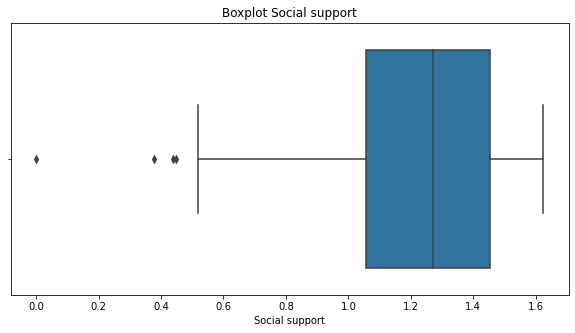

In [24]:
plt.figure(figsize = (10,5))
plt.title('Boxplot Social support')
sns.boxplot(data['Social support'])
plt.savefig('Social support-boxplot.jpg')

# 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Freedom to make life choices. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

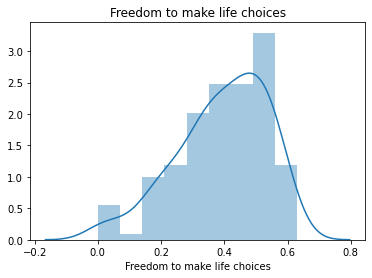

In [25]:
plt.title('Freedom to make life choices')
sns.distplot(data['Freedom to make life choices'])
plt.savefig('histFreedom to make life choices.jpg')

In [26]:
stat, pval = kstest(data['Freedom to make life choices'], 'norm')
pval < 0.05

True

**DARI KEDUA ANALISIS PERSEBARAN DATA DIATAS DAPAT DISIMPULKAN BAHWA PERSEBARAN DATA DI KOLOM  FREEDOM TO MAKE LIFE CHOICES BERDISTRIBUSI TIDAK NORMAL(LEFT SKEWED)**

In [27]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 4. Di antara GDP per capita, Social support, & Healthy life expectancy, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Score? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk pemerintah dalam merumuskan kebijakan?

In [28]:
stat3, pval3 = kstest(data['GDP per capita'], 'norm')
pval3 < 0.05

True

In [29]:
stat4, pval4 = kstest(data['Social support'], 'norm')
pval4 < 0.05

True

In [30]:
stat5, pval5 = kstest(data['Healthy life expectancy'], 'norm')
pval5 < 0.05

True

In [31]:
stat6, pval6 = kstest(data['Score'], 'norm')
pval5 < 0.05

True

In [32]:
data.corr(method='spearman')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999999,-0.814430,-0.816125,-0.807279,-0.552014,-0.070484,-0.217240
Score,-0.999999,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,-0.814430,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,-0.816125,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,-0.807279,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,-0.552014,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,-0.070484,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,-0.217240,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


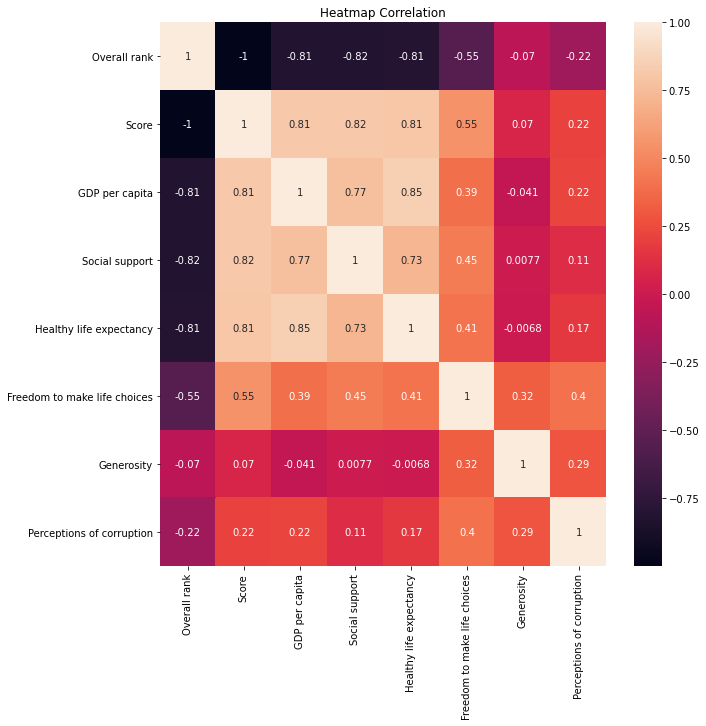

In [33]:
plt.figure(figsize = (10,10))
plt.title('Heatmap Correlation')
sns.heatmap(data.corr(method = 'spearman'), annot = True)
plt.savefig('heatmap-cor.jpg')

#### dari grafik diatas, dapat disimpulkan:
- Korelasi Score dengan GDP per capita = 0.81 (Tinggi)
- Korelasi Score dengan Social support = 0.82 (Tinggi)
- Korelasi Score dengan Healthy life expectancy = 0.81 (Tinggi)

Insight : tingginya GDP per capita, Social support, dan Healthy life expectancy sangat mempengaruhi nilai dari score kebahagiaan earga.

*Metode yang digunakan adalah Spearman, karena semua variable diatas berdistribusi tidak normal / non-Parametric*

# 5. Hitung berapa negara yang Score kebahagiaan warganya di atas rata-rata! Dari negara-negara yang Score-nya di atas rata-rata tersebut:

## Tampilkan 5 negara yang GDP per capita-nya tertinggi dalam bentuk Barplot!

In [45]:
region = data.groupby('Country or region').mean().sort_values('Score', ascending = False).reset_index()
region2 = region.head(5)
region2.head()

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [40]:
data['Country or region'].value_counts()

Trinidad & Tobago    1
Benin                1
Montenegro           1
Serbia               1
Brazil               1
                    ..
South Korea          1
India                1
Nepal                1
Malawi               1
Iraq                 1
Name: Country or region, Length: 156, dtype: int64

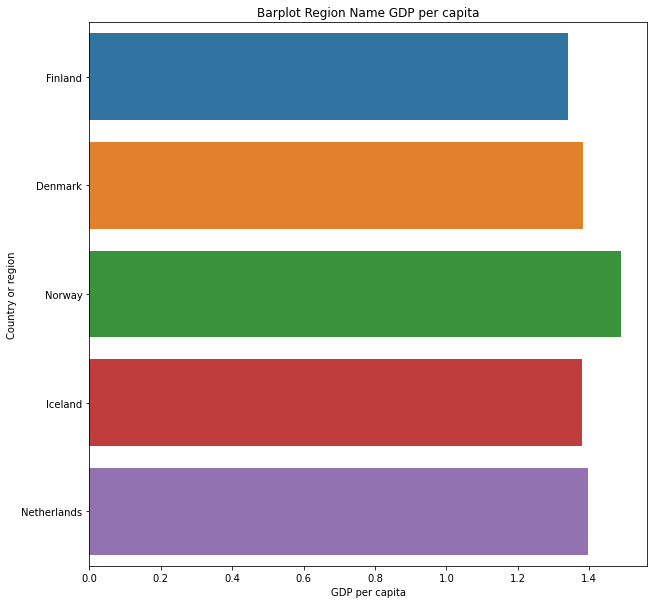

In [46]:
plt.figure(figsize = (10,10))
plt.title('Barplot Region Name GDP per capita')
sns.barplot(data = region2, y = 'Country or region', x = 'GDP per capita')

## Tampilkan 5 negara yang Perceptions of corruption terendah dalam bentuk Barplot!

In [50]:
region3 = region.sort_values('Perceptions of corruption', ascending = True).reset_index()
region3 = region3.head(5)
region3

,index,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,70,Moldova,71,5.529,0.685,1.328,0.739,0.245,0.181,0.000
1,96,Bulgaria,97,5.011,1.092,1.513,0.815,0.311,0.081,0.004
2,47,Romania,48,6.070,1.162,1.232,0.825,0.462,0.083,0.005
3,45,Kosovo,46,6.100,0.882,1.232,0.758,0.489,0.262,0.006
4,77,Bosnia and Herzegovina,78,5.386,0.945,1.212,0.845,0.212,0.263,0.006


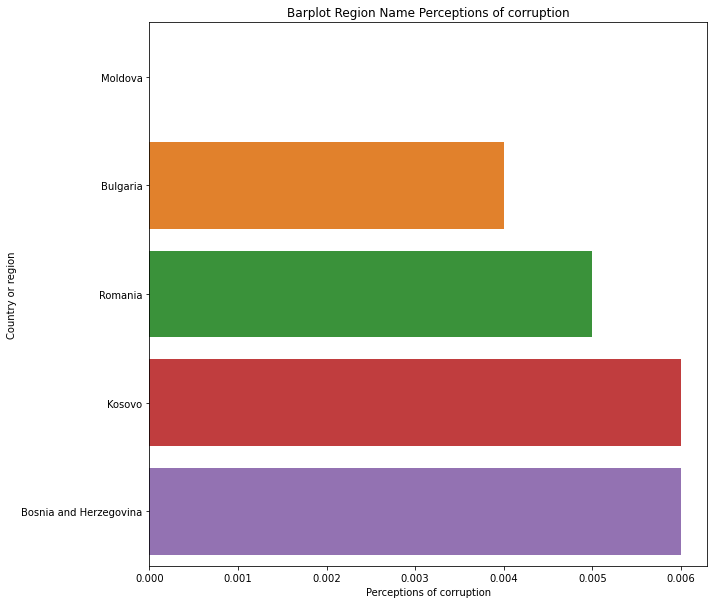

In [53]:
plt.figure(figsize = (10,10))
plt.title('Barplot Region Name Perceptions of corruption')
sns.barplot(data = region3, y = 'Country or region', x = 'Perceptions of corruption')

## Tampilkan 5 negara yang Generosity terendah dalam bentuk Barplot!

In [54]:
region4 = region.sort_values('Generosity', ascending = True).reset_index()
region4 = region4.head(5)
region4

,index,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,81,Greece,82,5.287,1.181,1.156,0.999,0.067,0.000,0.034
1,147,Botswana,148,3.488,1.041,1.145,0.538,0.455,0.025,0.100
2,89,Azerbaijan,90,5.208,1.043,1.147,0.769,0.351,0.035,0.182
3,88,Morocco,89,5.208,0.801,0.782,0.782,0.418,0.036,0.076
4,41,Lithuania,42,6.149,1.238,1.515,0.818,0.291,0.043,0.042


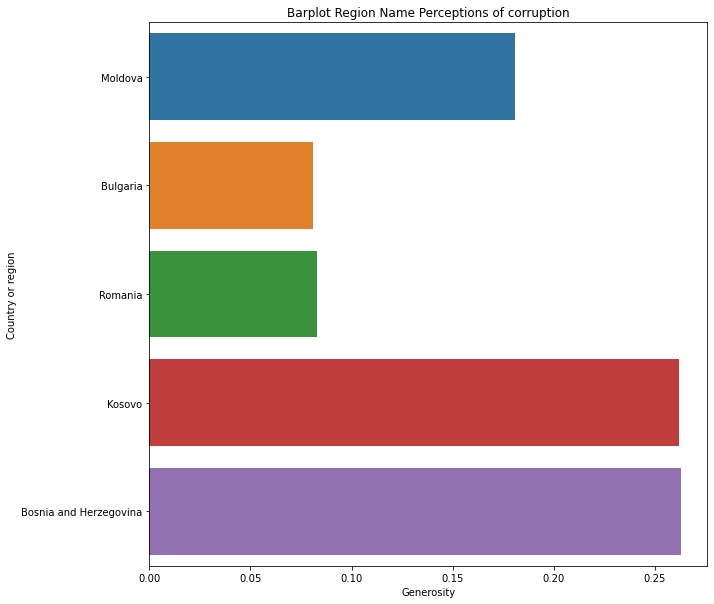

In [55]:
plt.figure(figsize = (10,10))
plt.title('Barplot Region Name Perceptions of corruption')
sns.barplot(data = region3, y = 'Country or region', x = 'Generosity')